## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


** Question 1 **
Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


![image.png](attachment:image.png)

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#/media/File:Monty_open_door.svg )

[Monty hall problem ]

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


In [56]:
#Import everything we need to use

%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [78]:
#1000 simulations
score_not_switching = []
mean_not_switching = []
score_switching = []
mean_switching = []
for i in range(1000): 
    #Randomly assign car and goats to numbers 1 - 3 which represent the doors and choose a door
    door_chosen = random.randint(1,3)
    door_car = random.randint(1,3)
    options = [1,2,3]
    
    # If we chose the correct door, both the others have goats behind them
    if door_chosen == door_car: 
        #Remove the door we chose 
        options.remove(door_chosen)
        #Randomly choose one of the remaining two doors to open 
        door_open = np.random.choice(options)
    
        door_switch = options.remove(door_open)

    #When they chose a goat to start, only one goat door remains
    else: 
        #Remove the door we chose
        options.remove(door_chosen)
        #Remove the door with the car as we don't want to open that one
        options.remove(door_car)
        #Thus only one door left to open 
        door_open = options
    
        door_switch = door_car    
        
    if door_switch == door_car: 
        #print("Win")
        score_switching.append(1)
        score_not_switching.append(0)
        mean_switching.append(np.mean(score_switching))
        mean_not_switching.append(np.mean(mean_not_switching))
    else: 
        #print("Lose")
        score_switching.append(0)
        score_not_switching.append(1)
        mean_switching.append(np.mean(score_switching))
        mean_not_switching.append(np.mean(score_not_switching))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


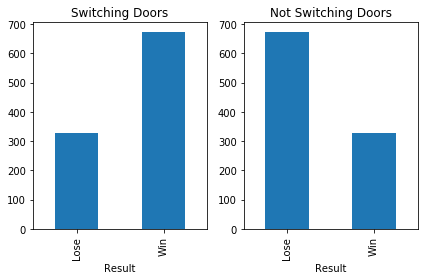

In [102]:
#Bar graph showing the results of switching doors
df_switching = pd.DataFrame(score_switching,columns=['Result'])
df_switching_bar = df_switching.groupby('Result').size()
#bar_switching = df_switching_bar.plot(kind='bar')

#Bar graph showing the results of not switching doors 
df_not_switching = pd.DataFrame(score_not_switching,columns=['Result'])
df_not_switching_bar = df_not_switching.groupby('Result').size()
#bar_not_switching = df_not_switching_bar.plot(kind='bar')

fig, ax = plt.subplots(1,2)
df_switching_bar.plot(kind='bar', ax=ax[0], title='Switching Doors')
df_not_switching_bar.plot(kind='bar', ax=ax[1], title='Not Switching Doors')
plt.setp(ax, xticks=[0,1], xticklabels=['Lose','Win'])
plt.tight_layout()
plt.show()

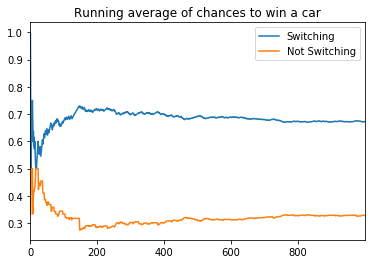

In [118]:
#mean_switching
#mean_not_switching
df_mean_switching = pd.DataFrame(mean_switching,columns=['Switching'])
df_mean_not_switching = pd.DataFrame(mean_not_switching,columns=['Not Switching'])
df_mean_not_switching.fillna(method='ffill',inplace=True)

ax = df_mean_switching.plot()
df_mean_not_switching.plot(ax=ax)
plt.title('Running average of chances to win a car')
plt.show()

You can see from the above chart that over time (simulations) your chances of winning the car greatly improve when you switch your chose of door vs. staying with your initial selection 